In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('movies_1.csv')
df2 = pd.read_csv('movies_2.csv')
df3 = pd.read_csv('movies_3.csv')

In [3]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(39213, 10)
(4721, 10)
(2200, 10)


In [4]:
df_combined = df1.append([df2,df3], ignore_index=True)

C:\Users\aditya\AppData\Local\Temp\ipykernel_9416\878563511.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_combined = df1.append([df2,df3], ignore_index=True)


In [5]:
df_combined.isnull().sum()

director_name      7
actor_1_name       7
actor_2_name      40
actor_3_name     162
genres             4
movie_title        7
movie_id           4
year               6
revenue            4
comb             165
dtype: int64

In [6]:
df_combined.shape

(46134, 10)

In [7]:
df_combined = df_combined.dropna(subset=df_combined.columns.difference(['year']), how='any')

In [8]:
# Filter out rows where 'genres' column contains 'Documentary' or 'TV' so we get only movies
df_combined = df_combined[~df_combined['genres'].str.contains('Documentary|TV', case=False)]

# Reset the index of the new DataFrame
df_combined.reset_index(drop=True, inplace=True)

In [9]:
# Filter out rows where 'revenue' column contains '0.0' 
df_combined = df_combined[df_combined['revenue'] != 0]

# Reset the index of the new DataFrame
df_combined.reset_index(drop=True, inplace=True)

In [10]:
# Sort the dataframe by 'revenue' in descending order
df_combined = df_combined.sort_values(by='revenue', ascending=False)

# Remove duplicates in 'movie_title' column while keeping the row with highest 'revenue'
df_combined = df_combined.drop_duplicates(subset='movie_title', keep='first')

In [11]:
df_combined.shape

(7889, 10)

In [12]:
# as we want to deploy the project unfortunately we have only 512 mb of ram on render
# so we have to include only fraction of the data

# get top 100 grossing movies from each year.

# Sort the DataFrame by 'year' and 'revenue' in descending order
sorted_df = df_combined.sort_values(by=['year', 'revenue'], ascending=[True, False])

# Group the sorted DataFrame by 'year' and get the top 100 rows for each group
top_100_movies = sorted_df.groupby('year').head(100)

# Reset the index of the new DataFrame
top_100_movies.reset_index(drop=True, inplace=True)

In [13]:
top_100_movies = top_100_movies.sort_values(by=['year', 'revenue'], ascending=[False, False])

In [14]:
top_100_movies = top_100_movies[top_100_movies['year'] >= 1990]

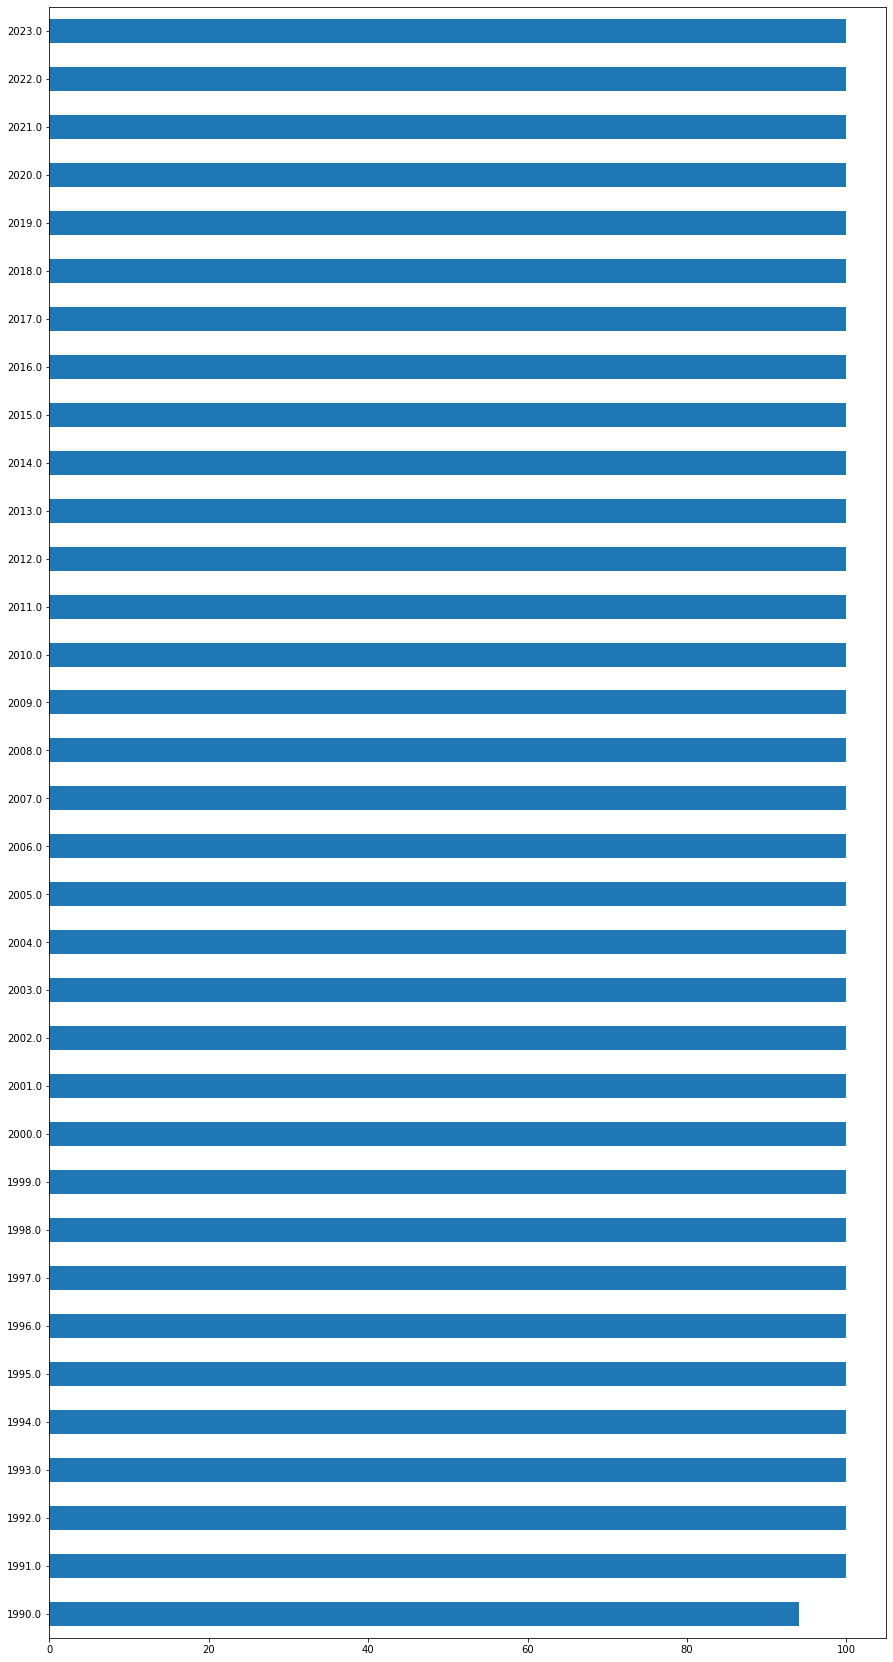

In [15]:
import matplotlib.pyplot as plt
top_100_movies.year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,30))
plt.show()

In [16]:
top_100_movies.to_csv('Final_movie_data.csv', index=False)

In [17]:
top_100_movies.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
movie_id         0
year             0
revenue          0
comb             0
dtype: int64

In [18]:
top_100_movies

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,movie_id,year,revenue,comb
4686,Greta Gerwig,Margot Robbie,Ryan Gosling,America Ferrera,Comedy Adventure,Barbie,346698.0,2023.0,1.445638e+09,Margot Robbie Ryan Gosling America Ferrera Gre...
4687,"Aaron Horvath, Michael Jelenic",Chris Pratt,Anya Taylor-Joy,Charlie Day,Animation Family Adventure Fantasy Comedy,The Super Mario Bros. Movie,502356.0,2023.0,1.362000e+09,Chris Pratt Anya Taylor-Joy Charlie Day Aaron ...
4688,Christopher Nolan,Cillian Murphy,Emily Blunt,Matt Damon,Drama History,Oppenheimer,872585.0,2023.0,9.520000e+08,Cillian Murphy Emily Blunt Matt Damon Christop...
4689,James Gunn,Chris Pratt,Zoe Saldaña,Dave Bautista,Sci-Fi Adventure Action,Guardians of the Galaxy Vol. 3,447365.0,2023.0,8.456000e+08,Chris Pratt Zoe Saldaña Dave Bautista James Gu...
4690,Louis Leterrier,Vin Diesel,Michelle Rodriguez,Tyrese Gibson,Action Crime Thriller,Fast X,385687.0,2023.0,7.047097e+08,Vin Diesel Michelle Rodriguez Tyrese Gibson Lo...
...,...,...,...,...,...,...,...,...,...,...
1481,Alan Smithee Michael Gottlieb,Cheech Marin,Emma Samms,Gary McCormick,Comedy Romance,Shrimp on the Barbie,34564.0,1990.0,4.589960e+05,Cheech Marin Emma Samms Gary McCormick Alan Sm...
1482,Frank Henenlotter,James Lorinz,Patty Mullen,Joanne Ritchie,Comedy Horror Sci-Fi,Frankenhooker,27274.0,1990.0,2.050680e+05,James Lorinz Patty Mullen Joanne Ritchie Frank...
1483,Wong Kar-wai,Andy Lau,Leslie Cheung,Maggie Cheung,Crime Drama Romance,Days of Being Wild,18311.0,1990.0,1.418640e+05,Andy Lau Leslie Cheung Maggie Cheung Wong Kar-...
1484,Joe Roth,Patrick Dempsey,Arye Gross,Daniel Stern,Comedy Drama,Coupe de Ville,39062.0,1990.0,7.150000e+02,Patrick Dempsey Arye Gross Daniel Stern Joe Ro...


In [19]:
top_100_movies[top_100_movies['revenue'] == 0]

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,movie_id,year,revenue,comb


In [20]:
df_duplicates = top_100_movies[top_100_movies.duplicated(subset=['movie_title'], keep=False)]

In [21]:
df_duplicates

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,movie_id,year,revenue,comb


In [22]:
df_duplicates = df_duplicates.sort_values(by='movie_title')

In [23]:
df_duplicates

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,movie_id,year,revenue,comb
